Mei-An Blatchford UID115943339

# Part 1

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import r2_score
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.formula.api as formula
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.neighbors import KNeighborsRegressor

In [23]:
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


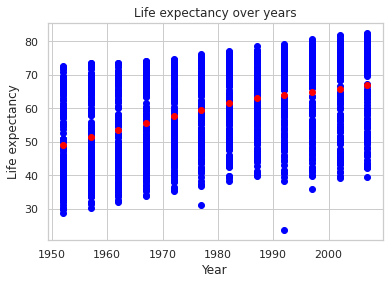

In [24]:
# Exercise 1: Make a scatter plot of life expectancy across time.
plt.scatter(data.year, data.lifeExp, c='blue')
plt.title('Life expectancy over years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

#Plotting the mean of the life expectancy
data_mean = data.groupby('year').mean() 
data_mean = data_mean.reset_index()
plt.scatter(data_mean.year, data_mean.lifeExp, c='red')

Question 1: 
From 1950 to 1970, the life expectancy is increasing linearly slowly. From 1970 to 1990, the the average lifetime expectancy slope increases. Throughout the 50 years life expenctancy is trending upwards.

Text(0.5, 1.0, 'Life expectancy over 50 years')

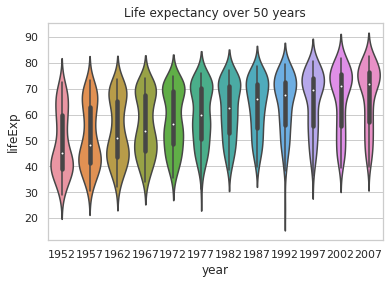

In [25]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=data["year"], y=data['lifeExp'], scale='width')
ax.set_title('Life expectancy over 50 years')

Question 2: Based on the violinplot, the data in 1952 to 1962 is more right skewed as we can see the bulk of the data in the lower half. Since 1992, the data has been skewed left instead of right as most of the data is in the upper part of the violin. In 1967-1972, the data is most symmetric. 

Question 3: I would reject the null hypothesis of no relationship due to the relationship of average longer lifetime expectancy over the years, which we can see in both plots.

Question 4: I would expect the residuals plot to be linear and centered around 0 due to the relationship between year and life expectancy.

Question 5: I would expect to see the violins to be roughly the same shape, unimodal, and centered around zero but increase over time. 

Slope of linear regression: 0.325904
Intercept of linear regression: -585.652187
p_value: 7.54679462560384e-80
0.4356112240540733


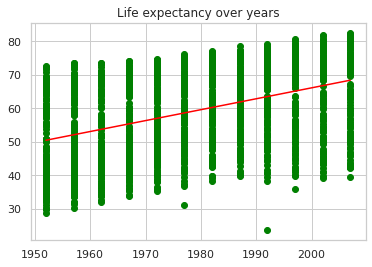

In [26]:
#Exercise 2: Fit a linear regression model
years = data[['year']].to_numpy()
lifeExp = data[['lifeExp']].to_numpy()
reg = LinearRegression().fit(years, lifeExp)
plt.title('Life expectancy over years')
plt.scatter(years, lifeExp, color='green')
plt.plot(years, reg.predict(years), color='red')
plt.show
slope, intercept, r_value, p_value, std_err = stats.linregress(years[:,0],lifeExp[:,0])
print('Slope of linear regression: %f' %slope)
print('Intercept of linear regression: %f' %intercept)
print ("p_value:", p_value)
print(r_value)

Question 6: Using the linear regression slope, the average life expectancy increases by 0.326 years every year.

Question 7: We would reject the null hypothesis of no relationship between time and life expenctancy since the p-value is below 0.05, it is 7.54679462560384e-80. 

Text(0.5, 1.0, 'Residuals vs year')

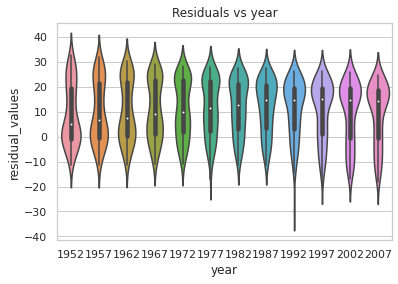

In [92]:
#Exercise 3 Make a violin plot of residuals vs. year for the linear model from Exercise 2.
data['residual_values'] = data['lifeExp'] - (data['year']*slope + intercept)
ax = sns.violinplot(x="year", y='residual_values', data=data)
ax.set_title('Residuals vs year')

Question 8: The Residual vs year graph looks somewhat like I predicted, the means are centered around 0 while a couple of years, they are centered around -/+5.

Text(0.5, 1.0, 'Residual vs continent')

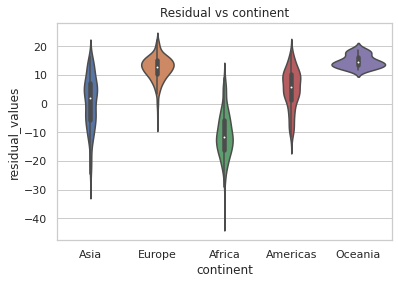

In [91]:
#Exercise 4: Make a boxplot (or violin plot) of model residuals vs. continent.
ax = sns.violinplot(x='continent', y='residual_values', data=data)
ax.set_title('Residual vs continent')

Question 9: There does appear to be a dependency between continent and residual values, for example Oceania and Europe have a higher life expectancy than Africa and Asia whch have lower averages and more variance. 

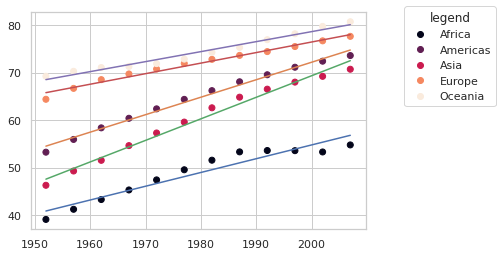

In [29]:
#Excerise 5: Make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line
fig, ax = plt.subplots()
data_cont = data.groupby(['continent','year']).mean()
data_cont = data_cont.reset_index()
u, data_cont["cont_col"] = np.unique(data_cont["continent"], return_inverse=True)
sc = ax.scatter(x = "year", y = "lifeExp", c = "cont_col", data=data_cont)
ax.legend(sc.legend_elements()[0], u, title="legend", bbox_to_anchor=(1.1, 1.05))
for c in data_cont.continent.unique():
    curr = data_cont.loc[data_cont['continent'] == c]
    z = np.polyfit(curr['year'], curr['lifeExp'], 1)
    p = np.poly1d(z)
    ax.plot(curr['year'], p(curr['year']))
    

Question 10: The above graph shows that there is a relationship based on continent and year. We should model an interaction between year and continent.

In [94]:
#Exercise 6: Fit a linear regression model for life expectancy including a term 
#for an interaction between continent and year.

model = formula.ols(formula='lifeExp ~ year:continent', data=data).fit()
print_model = model.summary()
print(print_model)
intercept = model.params[0]
params = model.params.reset_index(drop=True)
print(params)


                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     721.4
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:30:24   Log-Likelihood:                -5806.5
No. Observations:                1704   AIC:                         1.163e+04
Df Residuals:                    1698   BIC:                         1.166e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Question 11: My p values are zero, which shows that the interaction between continent and year is significant. 

In [37]:
pmean = params
print(pmean.drop(pmean.index[0]).mean())

0.32817024509191556


Question 12: For Africa, the average life expectancy increases by 0.3205 years per year. For Americas, the average life expectancy increases by 0.3285 years per year. For Asia, the average life expectancy increases by 0.3262 years per year. For Europe, the average life expectancy increases by 0.3322 years per year. For Oceania, the average life expectancy increases by 0.3334 years per year. As noted in other graphs, Oceania and Europe increase the most per year and Africa increases the least.

{'Africa': 0.32054198036159154, 'Americas': 0.3285257956453069, 'Asia': 0.3262117660256417, 'Europe': 0.33217442888715587, 'Oceania': 0.33339725453988167}
          country continent  year  lifeExp       pop   gdpPercap  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106   
...           ...       ...   ...      ...       ...         ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298   

      residual_values  inter

Text(0.5, 1.0, 'Residual vs year')

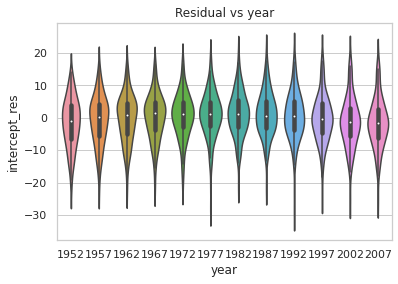

In [38]:
#Exercise 7: residuals vs. year violin plot for the interaction model
dict = {'Africa': params[1], 'Americas':params[2], 'Asia':params[3], 'Europe':params[4], 'Oceania':params[5]}
print(dict)
intercept_res = []
for index, row in data.iterrows():
    slope = dict.get(row['continent'])
    intercept_res.append(row['lifeExp'] - (row['year']*slope + intercept))

data['intercept_res'] = intercept_res
print(data)
ax = sns.violinplot(x='year', y='intercept_res', data=data)
ax.set_title("Residual vs year")

For the interaction residual, there is less of a range of the y-axis. It is unimodal and normally distributed. The data is also more centered around 0 than the previous graph.

# Part 2

1: From 442 diabetes patients, their age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained and standardized from 0 to 1. 
This dataset is from Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499. https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

In [90]:
# code from https://scikit-learn.org/stable/modules/cross_validation.html
#using holdout validation
#Using 40% of the data to test
X, y = datasets.load_diabetes(return_X_y=True)
#X is age 
#y is quantitative measure of disease progression one year after baseline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)
#Creating KNN regressor with 2 neighbors
neigh = KNeighborsRegressor(n_neighbors=2)
#Training the model
neigh.fit(X_train,y_train)
#Using the trained model to predict
neigh.predict(X_test)[0:5]
print(neigh.score(X_test, y_test))
#Creating KNN regressor with 10 neighbors
neigh = KNeighborsRegressor(n_neighbors=10)
#Training the model
neigh.fit(X_train,y_train)
#Using the trained model to predict
neigh.predict(X_test)[0:5]
print(neigh.score(X_test, y_test))
#Creating Decision Tree Regressor
clf = tree.DecisionTreeRegressor()
#Training model 
clf = clf.fit(X_train,y_train)
#Predicting
clf.predict(X_test)[0:5]
print(clf.score(X_test, y_test))

0.33809206698549255
0.457358589512627
-0.17855543790439987


2: For my algorithms, I chose to user Decision Tree regressor using default hyperparametes, creating a large and unpruned tree. For k-NN regressor, I used 2 and 10 as the n_neighbor parameter. 
The decision tree seems to be less accurate than k-NN neighbors. When k is increased it is more accurate at predicting the measure of disease progression, 33.8% accuracy versuses 45.7% Both of k-NN models are not very accurate to predicting the quantitive measure but are better than the decision tree. The lack of accuracy may bebecause I did not tune the hyperparameters and the tree might be too large. 
